absX


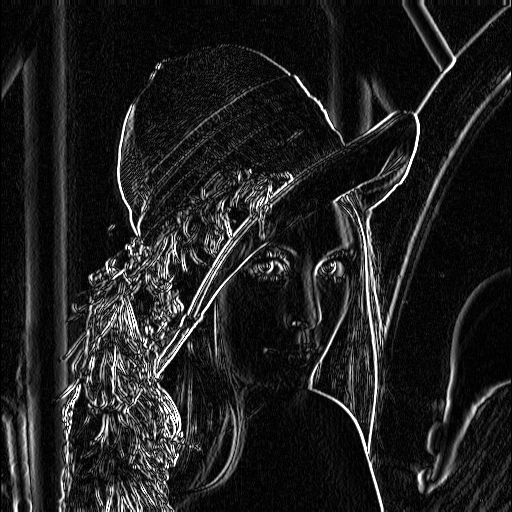

absY


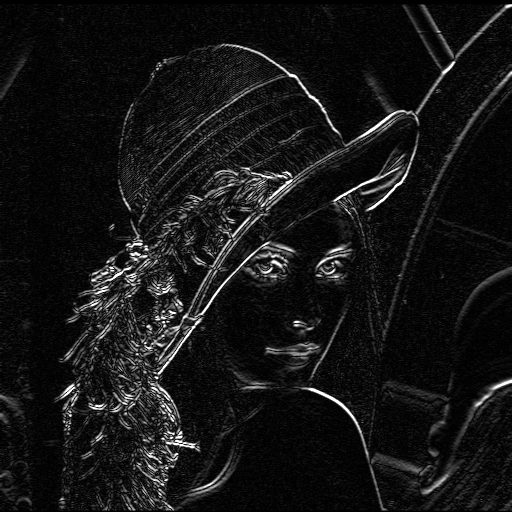

Result


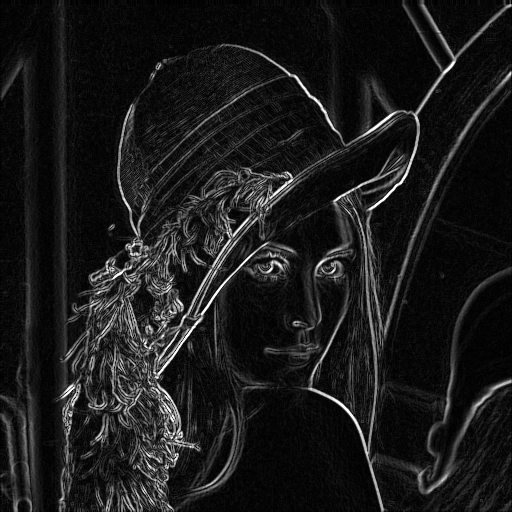

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("lenna.png", 0)

'''
Sobel函数求完导数后会有负值，还有会大于255的值。
而原图像是uint8，即8位无符号数(范围在[0,255])，所以Sobel建立的图像位数不够，会有截断。
因此要使用16位有符号的数据类型，即cv2.CV_16S。
'''
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

'''
在经过处理后，别忘了用convertScaleAbs()函数将其转回原来的uint8形式。
否则将无法显示图像，而只是一副灰色的窗口。
dst = cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])
其中可选参数alpha是伸缩系数，beta是加到结果上的一个值。结果返回uint8类型的图片。
'''

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

'''
由于Sobel算子是在两个方向计算的，最后还需要用cv2.addWeighted(...)函数将其组合起来。
其函数原型为：
dst = cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])
其中alpha是第一幅图片中元素的权重，beta是第二个的权重，
gamma是加到最后结果上的一个值。
'''
dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

print("absX")
cv2_imshow(absX)

print("absY")
cv2_imshow(absY)

print("Result")
cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
